In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Dataset available to download on:  [kaggle: Titanic Competition Data](https://www.kaggle.com/c/titanic/data) 💜

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

---

###  By: Abdiel Guerrero 💜

# Exploring Data 📊

We'll start reading our .csv files and put them in DataFrames to manage to work on Pandas.

In [ ]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
print(f'Train size: {len(train)}\nTest Size: {len(test)}')

Train size: 891
Test Size: 418


In [ ]:
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [ ]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Now, let's to check our data's keys (columns) and what the differences between `train_df` and `test_df` are (variable(s) to predict).

In [ ]:
keys_train = sorted(train.keys())
keys_test = sorted(test.keys())

In [ ]:
uncommon_key = []
for key in keys_train:
    if not key in keys_test:
        uncommon_key.append(key)
print(uncommon_key)

['Survived']


For the beginning, we'll check our numerical data:

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see in the `count` row that there are some missing values in our `Age` column. In fact, there are 177 missing values (891 - 714); it will be important later and we'll need to do something similar with categorical variables.

Now, let's try to visualize our `Survived` data grouped by gender and age:

In [ ]:
# Define a function which create and plot a new DF based on 'Survived' values.
def plot_by_surv_died(data, based_on, stacked=True, colors_= ['purple','black']):
    
    # Obtain survivors and died counts
    survive = data[data['Survived']==1][based_on].value_counts()
    dead = data[data['Survived']==0][based_on].value_counts()
    
    # Place these values on a new DF
    surv_dea_df = pd.DataFrame([survive, dead])
    surv_dea_df.index = ['Survived','Died']
    surv_dea_df.plot(kind='bar', stacked=stacked, color=colors_)

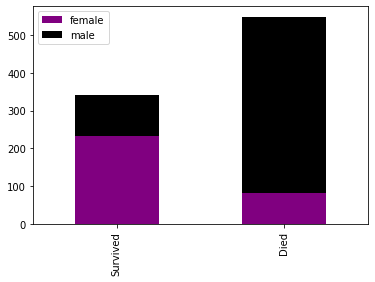

In [ ]:
plot_by_surv_died(train_df, 'Sex')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

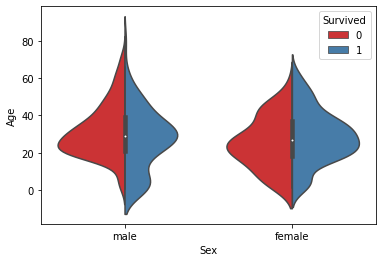

In [ ]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True, palette='Set1')

It's interesting to see how in men case the difference of surviving probabilities had reduced in base on how old they were, more specifically, men between 20's 35's tended to survive more than older men (40's - 80's). By the other hand, in the women case they survived compararively well on all the age groups.

Now, why not try to visualice if there ir an corelation between ticket `fare` and probabilities to survive? In this case we could imagine these probabilities are based on their position on the ship or their priority to be rescued.

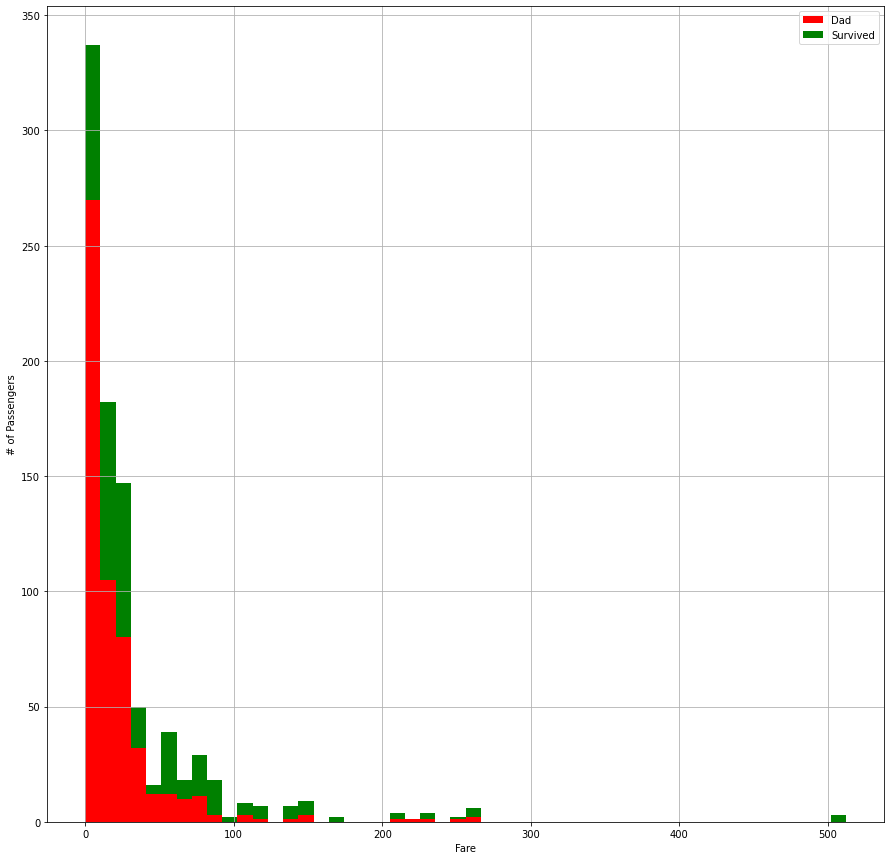

In [ ]:
figure = plt.figure(figsize=(15,15))
plt.hist([train_df[train_df['Survived']==0]['Fare'],
          train_df[train_df['Survived']==1]['Fare']],
         stacked=True,
         color = ['Red','Green'],
         bins = 50,
         label = ['Dad', 'Survived']
        )
plt.xlabel('Fare')
plt.grid()
plt.ylabel('# of Passengers')
plt.legend()

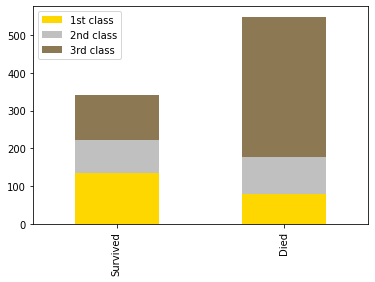

In [ ]:
plot_by_surv_died(train_df, 'Pclass', colors_=['#FFD700','#C0C0C0','#8C7853'])
plt.legend(['1st class','2nd class','3rd class'])

Despite of there was a very little part of expensive tickets passengers, the most part of them survived. By the other hand, more than half people who bought the cheapest tickets died.

Was there a kind of priority of rescue based on their social status, or it's more kind of a statistical mean based on the quantity of passengers in each fare kind?